In [1]:
import os
import sys
sys.path.append('/home/cjw/Code/DeepLearning')

import tensorflow as tf
import numpy as np
import pandas as pd

from autoencoder import autoencoder_train
from autoencoder import network
from autoencoder import utils

/home/cjw/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cjw/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/cjw/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cjw/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
#datadir = "/v/Data/cyto/ChannelOne/"
datadir = "/media/cjw/Data/cyto/zf_unsorted/"

mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/media/cjw/Data/cyto/zf_unsorted/Unsorted_UnsortedFish3.mm', '/media/cjw/Data/cyto/zf_unsorted/Unsorted_UnsortedFish6.mm', '/media/cjw/Data/cyto/zf_unsorted/Unsorted_UnsortedFish4.mm', '/media/cjw/Data/cyto/zf_unsorted/Unsorted_UnsortedFish7.mm', '/media/cjw/Data/cyto/zf_unsorted/Unsorted_UnsortedFish2.mm', '/media/cjw/Data/cyto/zf_unsorted/Unsorted_UnsortedFish1.mm', '/media/cjw/Data/cyto/zf_unsorted/Unsorted_UnsortedFish5.mm', '/media/cjw/Data/cyto/zf_unsorted/Unsorted_UnsortedFish8.mm']
(4,) [8949   64   64    5]
(4,) [9048   64   64    5]
(4,) [8727   64   64    5]
(4,) [8817   64   64    5]
(4,) [9002   64   64    5]
(4,) [8888   64   64    5]
(4,) [8988   64   64    5]
(4,) [8882   64   64    5]
71301


dict_keys(['Unsorted_UnsortedFish3.mm', 'Unsorted_UnsortedFish6.mm', 'Unsorted_UnsortedFish4.mm', 'Unsorted_UnsortedFish7.mm', 'Unsorted_UnsortedFish2.mm', 'Unsorted_UnsortedFish1.mm', 'Unsorted_UnsortedFish5.mm', 'Unsorted_UnsortedFish8.mm'])

In [5]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

8949
9048
8727
8817
9002
8888
8988
8882


Encoder True
Tensor("Placeholder:0", shape=(?, 32, 32, 1), dtype=float32) (?, 32, 32, 1)
Tensor("latent_space/BiasAdd:0", shape=(?, 128), dtype=float32)
isize:  4 32
Tensor("decoder_sigmoid:0", shape=(?, 32, 32, 1), dtype=float32)
71301 557 128
70789 512
Iteration:  0 Loss:  709.8647
Test Loss 709.7005
Iteration:  0 Loss:  709.8647
Test Loss 709.7005


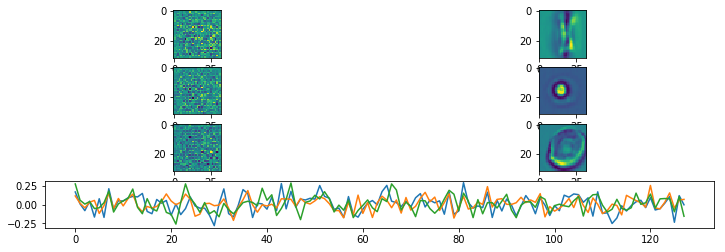

Iteration:  100 Loss:  682.89514
Test Loss 688.34094
Iteration:  200 Loss:  677.63324
Test Loss 681.51416
Iteration:  300 Loss:  673.0799
Test Loss 674.96844
Iteration:  400 Loss:  668.29236
Test Loss 668.1803
Iteration:  500 Loss:  657.20386
Test Loss 663.90454
Iteration:  600 Loss:  657.5263
Test Loss 660.9741
Iteration:  700 Loss:  660.23737
Test Loss 658.90875
Iteration:  800 Loss:  654.9564
Test Loss 657.10284
Iteration:  900 Loss:  657.9128
Test Loss 655.6322
Iteration:  1000 Loss:  656.49786
Test Loss 654.50916
Iteration:  1000 Loss:  656.49786
Test Loss 654.50916


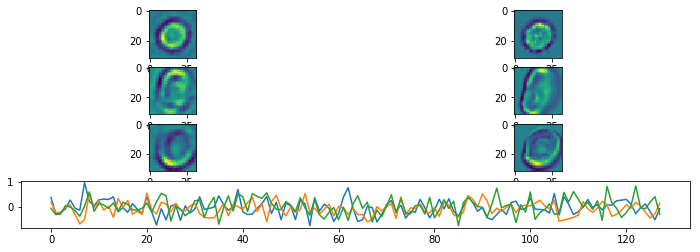

Iteration:  1100 Loss:  648.3428
Test Loss 653.4762
Iteration:  1200 Loss:  647.9651
Test Loss 652.54596
Iteration:  1300 Loss:  650.2461
Test Loss 651.9918
Iteration:  1400 Loss:  649.8766
Test Loss 651.309
Iteration:  1500 Loss:  644.9191
Test Loss 650.7584
Iteration:  1600 Loss:  650.12744
Test Loss 650.1802
Iteration:  1700 Loss:  643.32635
Test Loss 649.6781
Iteration:  1800 Loss:  644.22156
Test Loss 649.34656
Iteration:  1900 Loss:  648.6751
Test Loss 648.97455
Iteration:  2000 Loss:  651.10254
Test Loss 648.68933
Iteration:  2000 Loss:  651.10254
Test Loss 648.68933


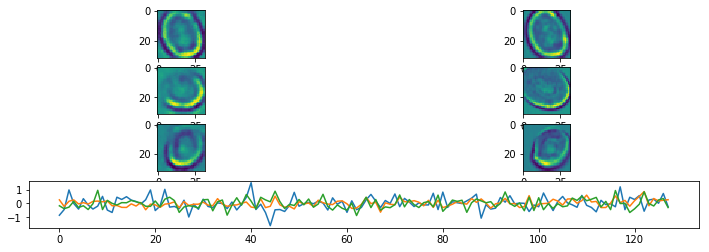

Iteration:  2100 Loss:  651.45496
Test Loss 648.3595
Iteration:  2200 Loss:  652.04016
Test Loss 648.05164
Iteration:  2300 Loss:  645.9859
Test Loss 647.8834
Iteration:  2400 Loss:  646.2606
Test Loss 647.5615
Iteration:  2500 Loss:  645.3384
Test Loss 647.41113
Iteration:  2600 Loss:  639.0226
Test Loss 647.1321
Iteration:  2700 Loss:  640.5634
Test Loss 646.9374
Iteration:  2800 Loss:  643.19763
Test Loss 646.7076
Iteration:  2900 Loss:  640.9195
Test Loss 646.59094
Iteration:  3000 Loss:  643.73535
Test Loss 646.40894
Iteration:  3000 Loss:  643.73535
Test Loss 646.40894


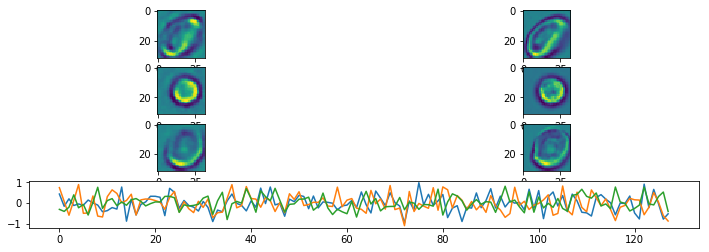

Iteration:  3100 Loss:  639.2517
Test Loss 646.1758
Iteration:  3200 Loss:  638.78735
Test Loss 646.067
Iteration:  3300 Loss:  647.7914
Test Loss 645.9231
Iteration:  3400 Loss:  637.3101
Test Loss 645.7471
Iteration:  3500 Loss:  638.06506
Test Loss 645.624
Iteration:  3600 Loss:  640.91174
Test Loss 645.48773
Iteration:  3700 Loss:  640.77795
Test Loss 645.3792
Iteration:  3800 Loss:  640.20276
Test Loss 645.25934
Iteration:  3900 Loss:  638.2679
Test Loss 645.1245
Iteration:  4000 Loss:  643.8667
Test Loss 645.05945
Iteration:  4000 Loss:  643.8667
Test Loss 645.05945


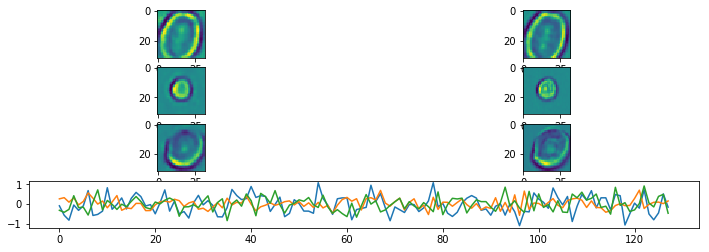

Iteration:  4100 Loss:  643.8022
Test Loss 644.9464
Iteration:  4200 Loss:  643.197
Test Loss 644.88684
Iteration:  4300 Loss:  643.0807
Test Loss 644.70544
Iteration:  4400 Loss:  644.6747
Test Loss 644.6375
Iteration:  4500 Loss:  639.1803
Test Loss 644.46014
Iteration:  4600 Loss:  645.9931
Test Loss 644.4857
Iteration:  4700 Loss:  639.7833
Test Loss 644.34735
Iteration:  4800 Loss:  644.1116
Test Loss 644.27527
Iteration:  4900 Loss:  644.5573
Test Loss 644.1365
Iteration:  5000 Loss:  638.1094
Test Loss 644.064
Iteration:  5000 Loss:  638.1094
Test Loss 644.064


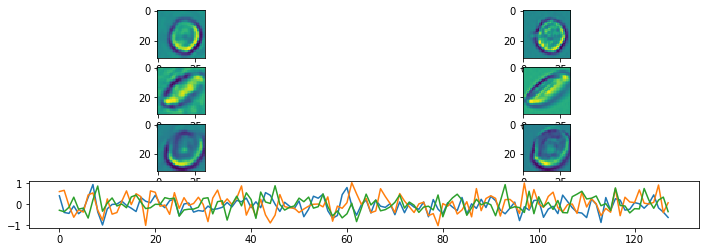

Iteration:  5100 Loss:  641.7114
Test Loss 643.9927
Iteration:  5200 Loss:  639.63513
Test Loss 643.9611
Iteration:  5300 Loss:  642.8572
Test Loss 643.84814
Iteration:  5400 Loss:  637.64154
Test Loss 643.8042
Iteration:  5500 Loss:  637.20715
Test Loss 643.6832
Iteration:  5600 Loss:  643.14465
Test Loss 643.6892
Iteration:  5700 Loss:  642.2957
Test Loss 643.5925
Iteration:  5800 Loss:  651.12494
Test Loss 643.5097
Iteration:  5900 Loss:  642.13806
Test Loss 643.4448
Iteration:  6000 Loss:  643.1477
Test Loss 643.4032
Iteration:  6000 Loss:  643.1477
Test Loss 643.4032


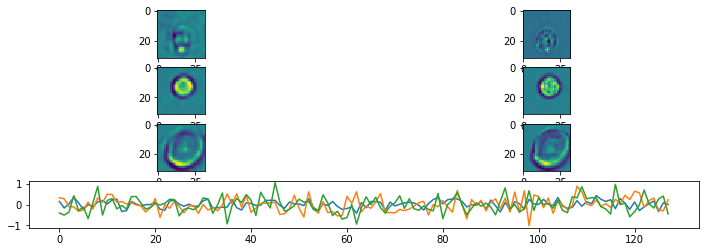

Iteration:  6100 Loss:  641.07666
Test Loss 643.3351
Iteration:  6200 Loss:  642.2786
Test Loss 643.23413
Iteration:  6300 Loss:  649.3076
Test Loss 643.25006
Iteration:  6400 Loss:  641.2955
Test Loss 643.14075
Iteration:  6500 Loss:  640.92065
Test Loss 643.0562
Iteration:  6600 Loss:  643.73474
Test Loss 643.0517
Iteration:  6700 Loss:  643.48816
Test Loss 642.9851
Iteration:  6800 Loss:  645.08997
Test Loss 642.9092
Iteration:  6900 Loss:  638.99634
Test Loss 642.8736
Iteration:  7000 Loss:  642.3669
Test Loss 642.86176
Iteration:  7000 Loss:  642.3669
Test Loss 642.86176


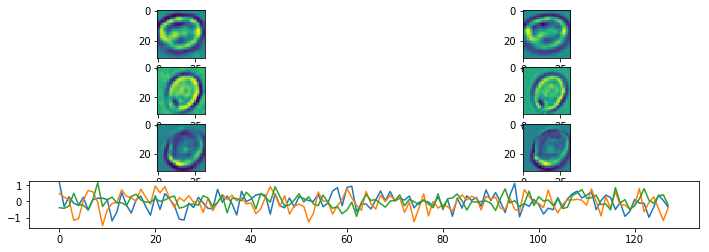

Iteration:  7100 Loss:  637.3782
Test Loss 642.7726
Iteration:  7200 Loss:  642.82086
Test Loss 642.74
Iteration:  7300 Loss:  634.0132
Test Loss 642.7203
Iteration:  7400 Loss:  639.4854
Test Loss 642.69806
Iteration:  7500 Loss:  634.9682
Test Loss 642.6472
Iteration:  7600 Loss:  637.9134
Test Loss 642.609
Iteration:  7700 Loss:  644.28503
Test Loss 642.5366
Iteration:  7800 Loss:  641.3029
Test Loss 642.49207
Iteration:  7900 Loss:  641.65436
Test Loss 642.4151
Iteration:  8000 Loss:  638.62476
Test Loss 642.43115
Iteration:  8000 Loss:  638.62476
Test Loss 642.43115


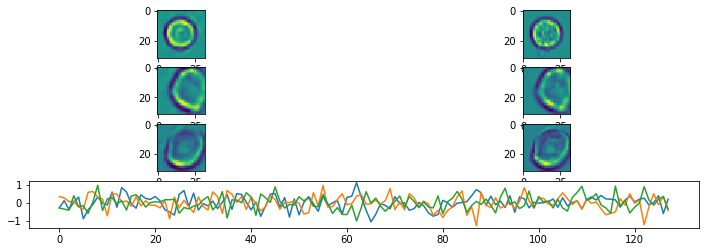

Iteration:  8100 Loss:  641.9027
Test Loss 642.381
Iteration:  8200 Loss:  640.5654
Test Loss 642.3151
Iteration:  8300 Loss:  637.5063
Test Loss 642.32684
Iteration:  8400 Loss:  646.9127
Test Loss 642.3081
Iteration:  8500 Loss:  644.00226
Test Loss 642.24725
Iteration:  8600 Loss:  636.59753
Test Loss 642.1797
Iteration:  8700 Loss:  643.2149
Test Loss 642.1731
Iteration:  8800 Loss:  636.8151
Test Loss 642.1127
Iteration:  8900 Loss:  633.35626
Test Loss 642.11444
Iteration:  9000 Loss:  633.9585
Test Loss 642.0656
Iteration:  9000 Loss:  633.9585
Test Loss 642.0656


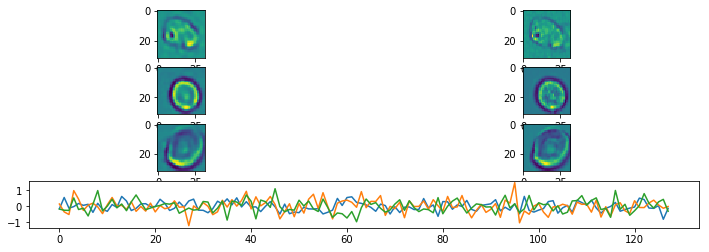

Iteration:  9100 Loss:  644.25323
Test Loss 642.019
Iteration:  9200 Loss:  638.9561
Test Loss 641.98944
Iteration:  9300 Loss:  634.78815
Test Loss 641.9614
Iteration:  9400 Loss:  633.79156
Test Loss 641.91656
Iteration:  9500 Loss:  643.19714
Test Loss 641.9299
Iteration:  9600 Loss:  642.0266
Test Loss 641.8397
Iteration:  9700 Loss:  633.208
Test Loss 641.87256
Iteration:  9800 Loss:  639.7484
Test Loss 641.8448
Iteration:  9900 Loss:  641.0836
Test Loss 641.8121
Iteration:  10000 Loss:  630.94696
Test Loss 641.7678
Iteration:  10000 Loss:  630.94696
Test Loss 641.7678


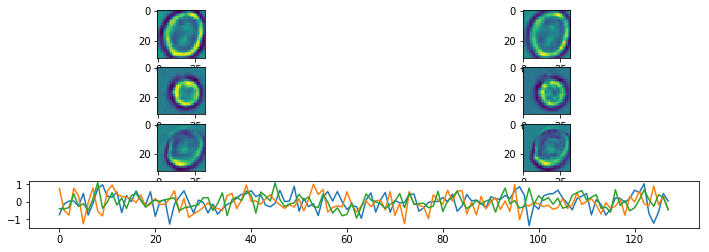

Iteration:  10100 Loss:  639.0398
Test Loss 641.7737
Iteration:  10200 Loss:  640.27344
Test Loss 641.7361
Iteration:  10300 Loss:  641.8401
Test Loss 641.688
Iteration:  10400 Loss:  639.71875
Test Loss 641.67664
Iteration:  10500 Loss:  636.1171
Test Loss 641.65
Iteration:  10600 Loss:  638.6909
Test Loss 641.6529
Iteration:  10700 Loss:  631.7364
Test Loss 641.61804
Iteration:  10800 Loss:  636.34985
Test Loss 641.5635
Iteration:  10900 Loss:  642.4879
Test Loss 641.5468
Iteration:  11000 Loss:  640.12476
Test Loss 641.51526
Iteration:  11000 Loss:  640.12476
Test Loss 641.51526


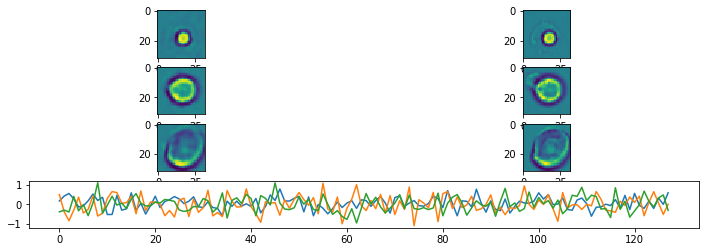

Iteration:  11100 Loss:  634.0493
Test Loss 641.509
Iteration:  11200 Loss:  643.37317
Test Loss 641.4907
Iteration:  11300 Loss:  631.97424
Test Loss 641.4756
Iteration:  11400 Loss:  635.52637
Test Loss 641.45404
Iteration:  11500 Loss:  641.66626
Test Loss 641.4288
Iteration:  11600 Loss:  634.95386
Test Loss 641.38586
Iteration:  11700 Loss:  638.9735
Test Loss 641.37286
Iteration:  11800 Loss:  638.926
Test Loss 641.4047
Iteration:  11900 Loss:  637.8895
Test Loss 641.3193
Iteration:  12000 Loss:  634.3818
Test Loss 641.3261
Iteration:  12000 Loss:  634.3818
Test Loss 641.3261


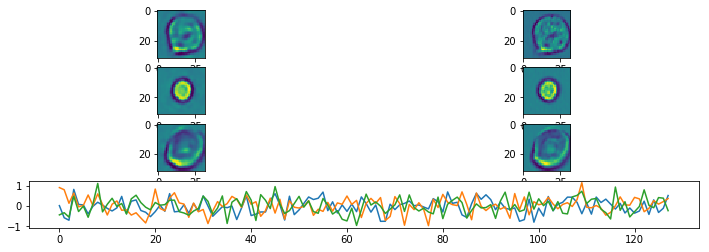

Iteration:  12100 Loss:  635.54675
Test Loss 641.3182
Iteration:  12200 Loss:  630.79987
Test Loss 641.3008
Iteration:  12300 Loss:  638.7584
Test Loss 641.2294
Iteration:  12400 Loss:  628.9193
Test Loss 641.2426
Iteration:  12500 Loss:  630.9384
Test Loss 641.23004
Iteration:  12600 Loss:  639.9657
Test Loss 641.1721
Iteration:  12700 Loss:  639.8424
Test Loss 641.15717
Iteration:  12800 Loss:  635.5255
Test Loss 641.194
Iteration:  12900 Loss:  639.63354
Test Loss 641.1754
Iteration:  13000 Loss:  638.30963
Test Loss 641.15186
Iteration:  13000 Loss:  638.30963
Test Loss 641.15186


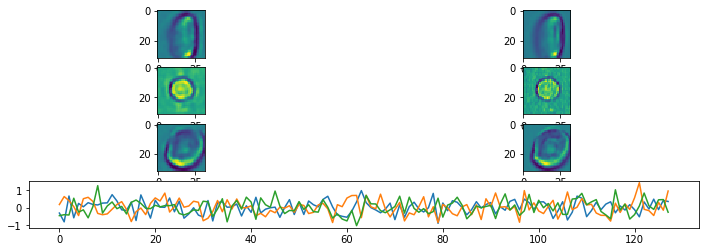

Iteration:  13100 Loss:  639.61194
Test Loss 641.1462
Iteration:  13200 Loss:  636.6537
Test Loss 641.1134
Iteration:  13300 Loss:  641.0199
Test Loss 641.12415
Iteration:  13400 Loss:  638.51825
Test Loss 641.1105
Iteration:  13500 Loss:  634.85583
Test Loss 641.07135
Iteration:  13600 Loss:  637.50476
Test Loss 641.0622
Iteration:  13700 Loss:  637.75256
Test Loss 641.0678
Iteration:  13800 Loss:  638.871
Test Loss 641.0368
Iteration:  13900 Loss:  635.48914
Test Loss 641.02924
Iteration:  14000 Loss:  637.1156
Test Loss 640.9862
Iteration:  14000 Loss:  637.1156
Test Loss 640.9862


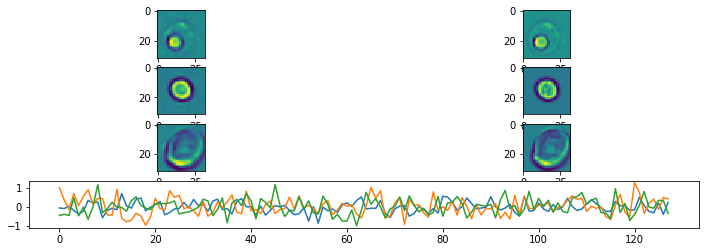

Iteration:  14100 Loss:  638.77026
Test Loss 640.9775
Iteration:  14200 Loss:  640.0405
Test Loss 640.9711
Iteration:  14300 Loss:  635.2103
Test Loss 640.9699
Iteration:  14400 Loss:  636.81195
Test Loss 640.97485
Iteration:  14500 Loss:  636.6289
Test Loss 640.9127
Iteration:  14600 Loss:  630.88135
Test Loss 640.8955
Iteration:  14700 Loss:  635.78723
Test Loss 640.92017
Iteration:  14800 Loss:  642.1
Test Loss 640.9054
Iteration:  14900 Loss:  639.45526
Test Loss 640.90533
Iteration:  15000 Loss:  640.80255
Test Loss 640.87714
Iteration:  15000 Loss:  640.80255
Test Loss 640.87714


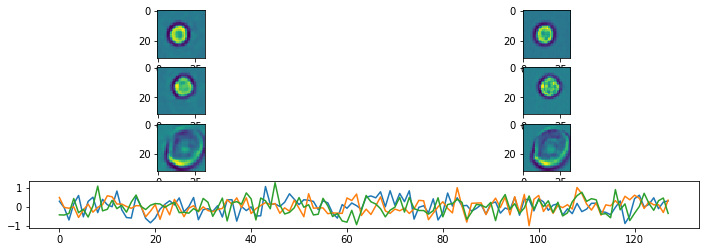

Iteration:  15100 Loss:  631.5839
Test Loss 640.86255
Iteration:  15200 Loss:  641.65625
Test Loss 640.8458
Iteration:  15300 Loss:  643.7622
Test Loss 640.85016
Iteration:  15400 Loss:  631.4018
Test Loss 640.78894
Iteration:  15500 Loss:  640.1343
Test Loss 640.7937
Iteration:  15600 Loss:  637.3262
Test Loss 640.8235
Iteration:  15700 Loss:  640.2842
Test Loss 640.81067
Iteration:  15800 Loss:  640.8286
Test Loss 640.76776
Iteration:  15900 Loss:  630.6122
Test Loss 640.76447
Iteration:  16000 Loss:  640.98975
Test Loss 640.7664
Iteration:  16000 Loss:  640.98975
Test Loss 640.7664


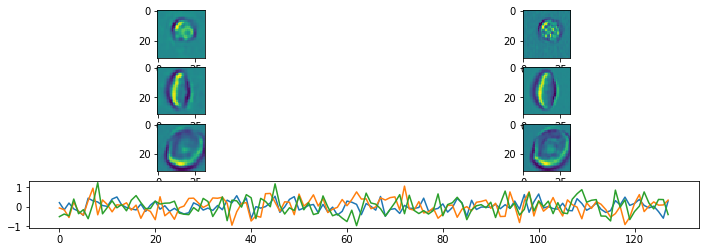

Iteration:  16100 Loss:  637.645
Test Loss 640.77814
Iteration:  16200 Loss:  640.8534
Test Loss 640.71594
Iteration:  16300 Loss:  641.6352
Test Loss 640.7284
Iteration:  16400 Loss:  631.4752
Test Loss 640.70874
Iteration:  16500 Loss:  641.1282
Test Loss 640.6923
Iteration:  16600 Loss:  638.8176
Test Loss 640.7446
Iteration:  16700 Loss:  634.22986
Test Loss 640.6899
Iteration:  16800 Loss:  635.76013
Test Loss 640.67755
Iteration:  16900 Loss:  634.71326
Test Loss 640.67993
Iteration:  17000 Loss:  634.8123
Test Loss 640.69965
Iteration:  17000 Loss:  634.8123
Test Loss 640.69965


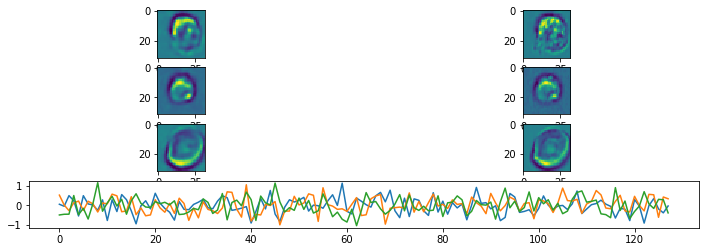

Iteration:  17100 Loss:  635.10974
Test Loss 640.635
Iteration:  17200 Loss:  639.7245
Test Loss 640.66064
Iteration:  17300 Loss:  633.50433
Test Loss 640.65204
Iteration:  17400 Loss:  634.35614
Test Loss 640.62225
Iteration:  17500 Loss:  631.88574
Test Loss 640.624
Iteration:  17600 Loss:  641.40015
Test Loss 640.62787
Iteration:  17700 Loss:  641.0675
Test Loss 640.6263
Iteration:  17800 Loss:  639.9911
Test Loss 640.6125
Iteration:  17900 Loss:  640.99133
Test Loss 640.5951
Iteration:  18000 Loss:  644.114
Test Loss 640.6115
Iteration:  18000 Loss:  644.114
Test Loss 640.6115


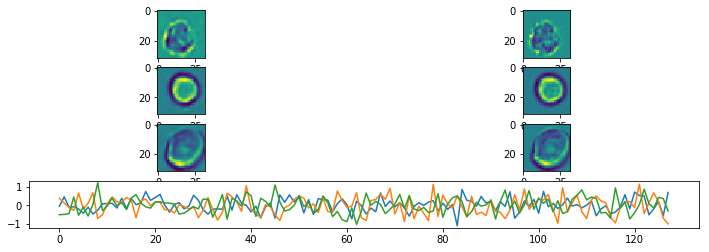

Iteration:  18100 Loss:  639.3789
Test Loss 640.6039
Iteration:  18200 Loss:  641.9142
Test Loss 640.5807
Iteration:  18300 Loss:  640.05164
Test Loss 640.58887
Iteration:  18400 Loss:  633.23035
Test Loss 640.56866
Iteration:  18500 Loss:  644.2928
Test Loss 640.53485
Iteration:  18600 Loss:  639.68427
Test Loss 640.5296
Iteration:  18700 Loss:  633.35913
Test Loss 640.5388
Iteration:  18800 Loss:  642.38196
Test Loss 640.53467
Iteration:  18900 Loss:  634.7158
Test Loss 640.4957
Iteration:  19000 Loss:  637.29706
Test Loss 640.50525
Iteration:  19000 Loss:  637.29706
Test Loss 640.50525


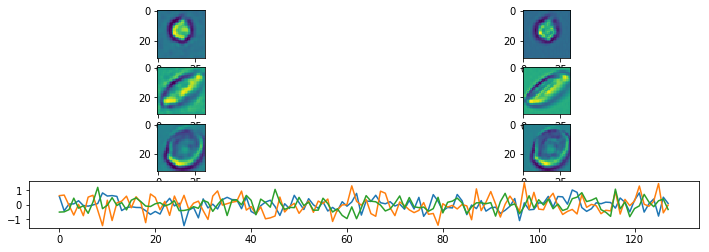

Iteration:  19100 Loss:  639.6615
Test Loss 640.5044
Iteration:  19200 Loss:  635.8518
Test Loss 640.49176
Iteration:  19300 Loss:  639.9407
Test Loss 640.46313
Iteration:  19400 Loss:  641.38165
Test Loss 640.46936
Iteration:  19500 Loss:  635.23914
Test Loss 640.4824
Iteration:  19600 Loss:  631.44446
Test Loss 640.4544
Iteration:  19700 Loss:  633.66815
Test Loss 640.4829
Iteration:  19800 Loss:  637.10254
Test Loss 640.43195
Iteration:  19900 Loss:  642.38855
Test Loss 640.4292
Iteration:  20000 Loss:  635.0422
Test Loss 640.4568
Iteration:  20000 Loss:  635.0422
Test Loss 640.4568


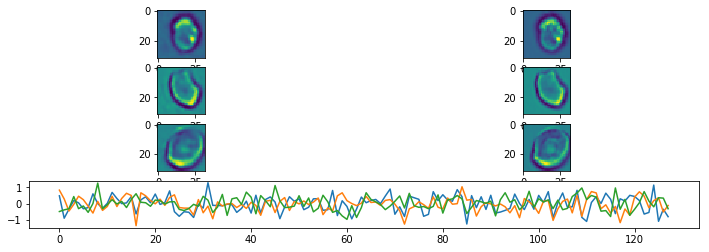

Iteration:  20100 Loss:  642.67773
Test Loss 640.4461
Iteration:  20200 Loss:  633.9588
Test Loss 640.4315
Iteration:  20300 Loss:  640.08215
Test Loss 640.45197
Iteration:  20400 Loss:  630.9391
Test Loss 640.42426
Iteration:  20500 Loss:  632.802
Test Loss 640.3897
Iteration:  20600 Loss:  636.9929
Test Loss 640.38214
Iteration:  20700 Loss:  644.36664
Test Loss 640.418
Iteration:  20800 Loss:  631.8082
Test Loss 640.4019
Iteration:  20900 Loss:  636.3817
Test Loss 640.40045
Iteration:  21000 Loss:  636.9385
Test Loss 640.4199
Iteration:  21000 Loss:  636.9385
Test Loss 640.4199


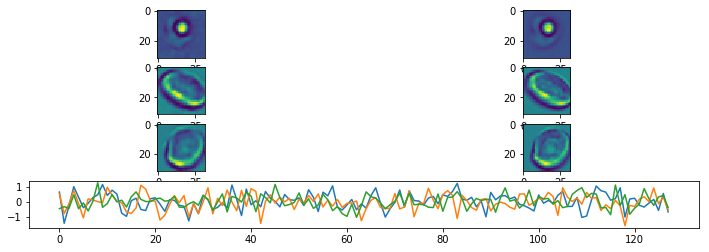

Iteration:  21100 Loss:  637.5714
Test Loss 640.3636
Iteration:  21200 Loss:  641.8415
Test Loss 640.3554
Iteration:  21300 Loss:  639.361
Test Loss 640.377
Iteration:  21400 Loss:  639.4523
Test Loss 640.3532
Iteration:  21500 Loss:  642.64685
Test Loss 640.3429
Iteration:  21600 Loss:  635.0095
Test Loss 640.3532
Iteration:  21700 Loss:  634.7811
Test Loss 640.37317
Iteration:  21800 Loss:  640.2597
Test Loss 640.3451
Iteration:  21900 Loss:  635.89264
Test Loss 640.35596
Iteration:  22000 Loss:  635.3186
Test Loss 640.33655
Iteration:  22000 Loss:  635.3186
Test Loss 640.33655


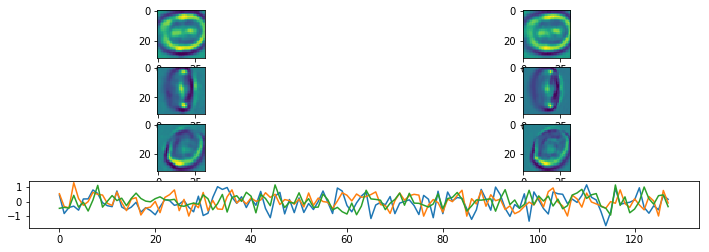

Iteration:  22100 Loss:  638.83093
Test Loss 640.30096
Iteration:  22200 Loss:  638.40814
Test Loss 640.3113
Iteration:  22300 Loss:  634.96796
Test Loss 640.30884
Iteration:  22400 Loss:  637.65576
Test Loss 640.30084
Iteration:  22500 Loss:  640.9057
Test Loss 640.30896
Iteration:  22600 Loss:  639.0239
Test Loss 640.29846
Iteration:  22700 Loss:  631.121
Test Loss 640.2868
Iteration:  22800 Loss:  638.5958
Test Loss 640.3147
Iteration:  22900 Loss:  637.8211
Test Loss 640.27075
Iteration:  23000 Loss:  642.29395
Test Loss 640.30994
Iteration:  23000 Loss:  642.29395
Test Loss 640.30994


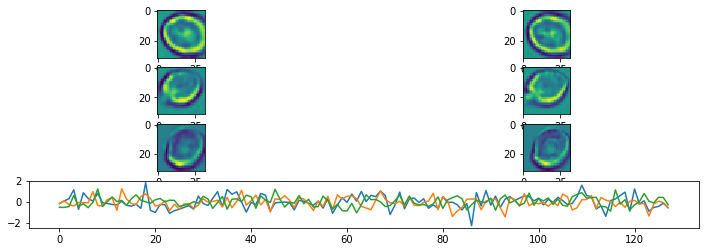

Iteration:  23100 Loss:  628.5338
Test Loss 640.29736
Iteration:  23200 Loss:  630.4067
Test Loss 640.27875
Iteration:  23300 Loss:  636.35095
Test Loss 640.28485
Iteration:  23400 Loss:  633.7982
Test Loss 640.27026
Iteration:  23500 Loss:  632.5939
Test Loss 640.26495
Iteration:  23600 Loss:  642.29083
Test Loss 640.2468
Iteration:  23700 Loss:  640.57043
Test Loss 640.2419
Iteration:  23800 Loss:  643.9997
Test Loss 640.2265
Iteration:  23900 Loss:  637.38
Test Loss 640.23157
Iteration:  24000 Loss:  638.04865
Test Loss 640.2483
Iteration:  24000 Loss:  638.04865
Test Loss 640.2483


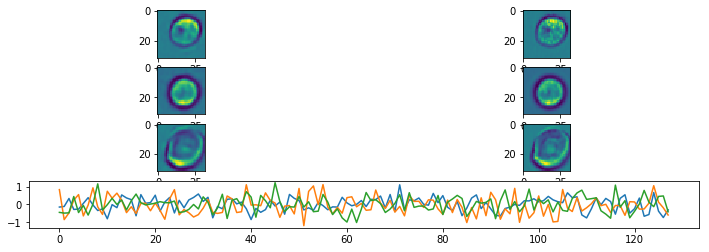

Iteration:  24100 Loss:  639.9585
Test Loss 640.2328
Iteration:  24200 Loss:  640.00885
Test Loss 640.24475
Iteration:  24300 Loss:  640.9497
Test Loss 640.23865
Iteration:  24400 Loss:  632.47485
Test Loss 640.2038
Iteration:  24500 Loss:  640.97656
Test Loss 640.21844
Iteration:  24600 Loss:  633.14343
Test Loss 640.1798
Iteration:  24700 Loss:  638.97894
Test Loss 640.1978
Iteration:  24800 Loss:  633.33295
Test Loss 640.20636
Iteration:  24900 Loss:  635.7976
Test Loss 640.20544
Iteration:  25000 Loss:  633.75616
Test Loss 640.1759
Iteration:  25000 Loss:  633.75616
Test Loss 640.1759


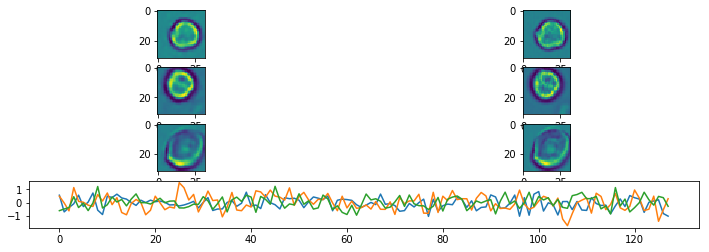

Iteration:  25100 Loss:  638.8211
Test Loss 640.1904
Iteration:  25200 Loss:  641.7622
Test Loss 640.201
Iteration:  25300 Loss:  642.88916
Test Loss 640.1934
Iteration:  25400 Loss:  641.1006
Test Loss 640.16406
Iteration:  25500 Loss:  636.73315
Test Loss 640.1703
Iteration:  25600 Loss:  637.4004
Test Loss 640.1609
Iteration:  25700 Loss:  641.76996
Test Loss 640.17633
Iteration:  25800 Loss:  626.2379
Test Loss 640.1518
Iteration:  25900 Loss:  641.2245
Test Loss 640.1548
Iteration:  26000 Loss:  640.29407
Test Loss 640.1719
Iteration:  26000 Loss:  640.29407
Test Loss 640.1719


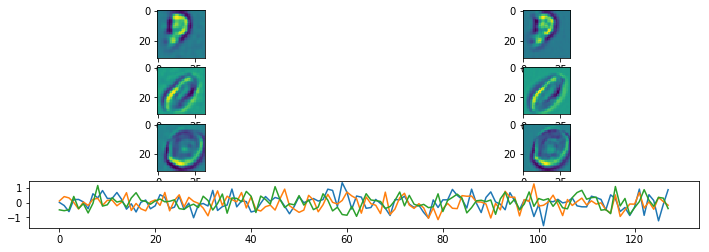

Iteration:  26100 Loss:  636.84503
Test Loss 640.1312
Iteration:  26200 Loss:  634.83777
Test Loss 640.1679
Iteration:  26300 Loss:  639.08997
Test Loss 640.16724
Iteration:  26400 Loss:  641.8118
Test Loss 640.13153
Iteration:  26500 Loss:  641.82007
Test Loss 640.1517
Iteration:  26600 Loss:  636.2578
Test Loss 640.1428
Iteration:  26700 Loss:  634.66425
Test Loss 640.10596
Iteration:  26800 Loss:  641.4426
Test Loss 640.14844
Iteration:  26900 Loss:  639.7374
Test Loss 640.1484
Iteration:  27000 Loss:  639.76337
Test Loss 640.10425
Iteration:  27000 Loss:  639.76337
Test Loss 640.10425


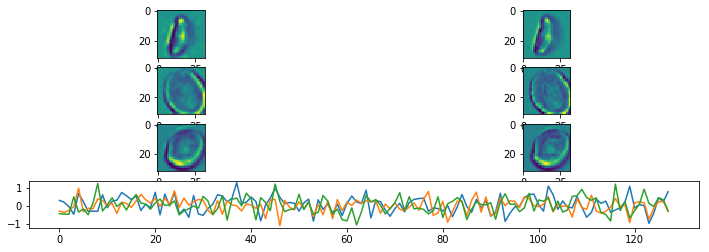

Iteration:  27100 Loss:  635.7772
Test Loss 640.1343
Iteration:  27200 Loss:  644.7023
Test Loss 640.1315
Iteration:  27300 Loss:  638.48663
Test Loss 640.09454
Iteration:  27400 Loss:  640.8613
Test Loss 640.086
Iteration:  27500 Loss:  630.8915
Test Loss 640.12695
Iteration:  27600 Loss:  637.6359
Test Loss 640.10693
Iteration:  27700 Loss:  632.32556
Test Loss 640.096
Iteration:  27800 Loss:  640.84973
Test Loss 640.0979
Iteration:  27900 Loss:  633.3346
Test Loss 640.10974
Iteration:  28000 Loss:  636.2484
Test Loss 640.10486
Iteration:  28000 Loss:  636.2484
Test Loss 640.10486


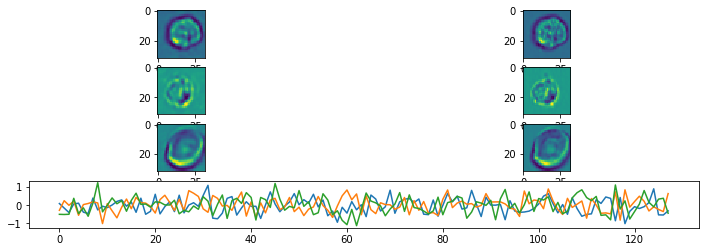

Iteration:  28100 Loss:  637.09595
Test Loss 640.09766
Iteration:  28200 Loss:  635.16614
Test Loss 640.0686
Iteration:  28300 Loss:  635.51794
Test Loss 640.07306
Iteration:  28400 Loss:  633.174
Test Loss 640.0844
Iteration:  28500 Loss:  637.8207
Test Loss 640.0927
Iteration:  28600 Loss:  638.1429
Test Loss 640.1001
Iteration:  28700 Loss:  634.2746
Test Loss 640.0825
Iteration:  28800 Loss:  638.1417
Test Loss 640.07214
Iteration:  28900 Loss:  640.54205
Test Loss 640.0595
Iteration:  29000 Loss:  637.30005
Test Loss 640.089
Iteration:  29000 Loss:  637.30005
Test Loss 640.089


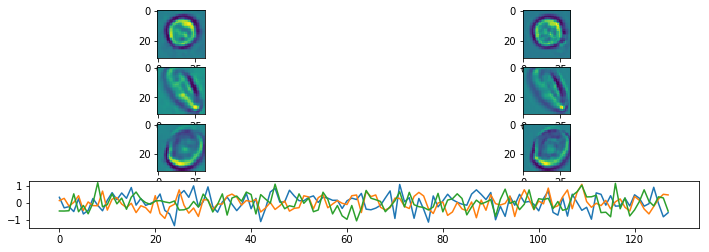

Iteration:  29100 Loss:  636.5037
Test Loss 640.0616
Iteration:  29200 Loss:  637.8601
Test Loss 640.05273
Iteration:  29300 Loss:  635.7679
Test Loss 640.06
Iteration:  29400 Loss:  637.34
Test Loss 640.0753
Iteration:  29500 Loss:  638.4481
Test Loss 640.0662
Iteration:  29600 Loss:  632.5204
Test Loss 640.04236
Iteration:  29700 Loss:  629.9
Test Loss 640.0439
Iteration:  29800 Loss:  635.20386
Test Loss 640.0065
Iteration:  29900 Loss:  640.7267
Test Loss 640.03796
Iteration:  30000 Loss:  636.3801
Test Loss 640.0408
Iteration:  30000 Loss:  636.3801
Test Loss 640.0408


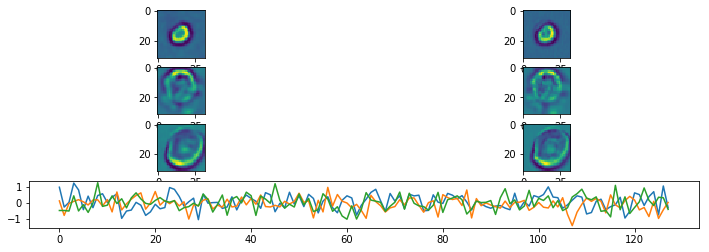

Iteration:  30100 Loss:  638.7753
Test Loss 640.0266
Iteration:  30200 Loss:  639.90283
Test Loss 640.0628
Iteration:  30300 Loss:  635.8434
Test Loss 640.0291
Iteration:  30400 Loss:  636.5611
Test Loss 640.0221
Iteration:  30500 Loss:  629.849
Test Loss 640.0383
Iteration:  30600 Loss:  638.7654
Test Loss 640.02167
Iteration:  30700 Loss:  638.4271
Test Loss 640.033
Done


In [7]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 32
p_height = 32
p_nchannels = 1
p_channels = [0]
p_nepochs = 240
p_batchsize = 128
p_learning_rate = 0.00005  #.00005
p_restore = False
p_latent_size = 128 #128 + 64
p_droprate = 0.75
p_stdev = .04
p_slam = .000
p_denoise = None
enc_sizes = [(128, 3), (256, 3), (512, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = p_droprate
params['stdev'] = p_stdev
params['slam'] = p_slam
params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes
params['denoise'] = p_denoise
cpdir = "/media/cjw/Data/cyto/Checkpoints/2018-12-31-ZebraFish2_bf_ce"

if not os.path.exists(cpdir):
    os.makedirs(cpdir)
autoencoder_train.train(p_mmdict, p_df, params, 1000, cpdir, tloss=.0001)

In [5]:
x = 4
x

4